#AG2 - Actividad Guiada 2

Nombre: Rafael Collado Molina <br>
URL: https://github.com/BLueFiReW/Algoritmos-de-Optimizacion/




In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

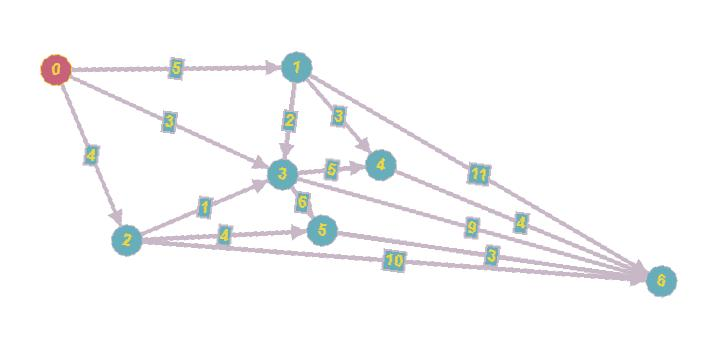

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [6]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [7]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [8]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [9]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [10]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [11]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


<h2 style="color:#d00000;">✅ MEJORA PARA OPTAR AL 10/10: DOS PUNTOS MÁS CERCANOS</h2>
En la guía AG2 se propone, para mejorar la nota:

- Estimar la **complejidad** del algoritmo por **fuerza bruta**.
- Generar matrices aleatorias de dimensiones mayores (5, 6, 7, …) y ejecutar **ambos** algoritmos.
- Concluir: ¿a partir de qué dimensión fuerza bruta deja de ser viable? ¿y ramificación y poda?



In [18]:
import math
import time
import heapq
import numpy as np
import pandas as pd


# ============================================================
# 1) FUERZA BRUTA (backtracking estilo AG1) con time_limit
#    S[i] = tarea asignada al agente i
# ============================================================
def fuerza_bruta_asignacion_bt(COSTES, time_limit=5.0):
    """
    Fuerza bruta por backtracking (estilo AG1).
    S[i] = tarea asignada al agente i.
    Devuelve (mejor_sol, mejor_coste, stats).
    """
    n = len(COSTES)
    t0 = time.perf_counter()

    mejor_coste = float("inf")
    mejor_sol = None

    usadas = [False] * n
    S = [-1] * n

    perm_probadas = 0
    timeout = False

    def dfs(i, coste_acum):
        nonlocal mejor_coste, mejor_sol, perm_probadas, timeout

        # corte por tiempo
        if (time.perf_counter() - t0) > time_limit:
            timeout = True
            return

        if i == n:
            perm_probadas += 1
            if coste_acum < mejor_coste:
                mejor_coste = coste_acum
                mejor_sol = tuple(S)
            return

        for tarea in range(n):
            if not usadas[tarea]:
                usadas[tarea] = True
                S[i] = tarea
                dfs(i + 1, coste_acum + COSTES[i][tarea])
                S[i] = -1
                usadas[tarea] = False

                if timeout:
                    return

    dfs(0, 0)

    total = math.factorial(n)
    stats = {
        "n": n,
        "permutaciones_probadas": perm_probadas,
        "total_permutaciones": total,
        "tiempo_s": time.perf_counter() - t0,
        "timeout": timeout or (perm_probadas < total)
    }
    return mejor_sol, mejor_coste, stats


# ============================================================
# 2) Generador de matrices de costes aleatorias
# ============================================================
def generar_matriz_costes(n, seed=None, low=1, high=100):
    rng = np.random.default_rng(seed)
    return rng.integers(low, high, size=(n, n)).tolist()


# ============================================================
# 3) RAMIFICACIÓN Y PODA SOLO PARA BENCHMARK
#    - Acepta time_limit
#    - Devuelve (sol, coste, stats)
#    - S[i] = tarea asignada al agente i
# ============================================================
def ramificacion_y_poda_bench(COSTES, time_limit=5.0):
    n = len(COSTES)
    t0 = time.perf_counter()

    #coste de una solución parcial/completa
    def coste(S):
        return sum(COSTES[i][S[i]] for i in range(len(S)))

    #cota inferior: coste fijado + para cada agente restante el mínimo entre tareas restantes
    def cota_inferior(S):
        c = coste(S)
        usadas = set(S)
        restantes = [t for t in range(n) if t not in usadas]
        for i in range(len(S), n):
            c += min(COSTES[i][t] for t in restantes)
        return c

    #cota superior inicial rápida (greedy)
    tareas_libres = set(range(n))
    sol_greedy = []
    coste_greedy = 0
    for i in range(n):
        t = min(tareas_libres, key=lambda task: COSTES[i][task])
        sol_greedy.append(t)
        coste_greedy += COSTES[i][t]
        tareas_libres.remove(t)

    mejor_sol = tuple(sol_greedy)
    mejor_coste = coste_greedy

    #heap por (cota_inferior, solucion_parcial)
    heap = []
    heapq.heappush(heap, (cota_inferior(()), ()))

    nodos_generados = 1
    nodos_expandidos = 0
    timeout = False

    while heap:
        if (time.perf_counter() - t0) > time_limit:
            timeout = True
            break

        ci, S = heapq.heappop(heap)
        nodos_expandidos += 1

        # poda
        if ci >= mejor_coste:
            continue

        k = len(S)
        if k == n:
            #solución completa
            if ci < mejor_coste:
                mejor_coste = ci
                mejor_sol = S
            continue

        usadas = set(S)
        for t in range(n):
            if t in usadas:
                continue
            hijo = S + (t,)
            ci_hijo = cota_inferior(hijo)
            nodos_generados += 1
            if ci_hijo < mejor_coste:
                heapq.heappush(heap, (ci_hijo, hijo))

    stats = {
        "n": n,
        "tiempo_s": time.perf_counter() - t0,
        "timeout": timeout,
        "nodos_generados": nodos_generados,
        "nodos_expandidos": nodos_expandidos
    }
    return mejor_sol, mejor_coste, stats


# ============================================================
# 4) Benchmark comparativo FB vs R&P (con timeouts)
# ============================================================
def benchmark(dimensiones=(4, 5, 6, 7, 8, 9, 10), repeticiones=3,
              time_limit_fb=5.0, time_limit_bb=5.0, seed=123):
    filas = []
    rng = np.random.default_rng(seed)

    for n in dimensiones:
        for rep in range(repeticiones):
            C = generar_matriz_costes(n, seed=int(rng.integers(0, 10_000)))

            #Fuerza bruta
            fb_sol, fb_coste, fb_stats = fuerza_bruta_asignacion_bt(C, time_limit=time_limit_fb)

            #Ramificación y poda
            bb_sol, bb_coste, bb_stats = ramificacion_y_poda_bench(C, time_limit=time_limit_bb)

            filas.append({
                "n": n,
                "rep": rep,

                "fb_tiempo_s": fb_stats["tiempo_s"],
                "fb_timeout": fb_stats["timeout"],
                "fb_perm_probadas": fb_stats["permutaciones_probadas"],
                "fb_total_perm": fb_stats["total_permutaciones"],

                "bb_tiempo_s": bb_stats["tiempo_s"],
                "bb_timeout": bb_stats["timeout"],
                "bb_nodos_gen": bb_stats["nodos_generados"],
                "bb_nodos_exp": bb_stats["nodos_expandidos"],

                "mejor_coste_fb": fb_coste,
                "mejor_coste_bb": bb_coste,

                #solo tiene sentido comprobar si FB acabó (sin timeout)
                "coinciden_coste": (fb_coste == bb_coste) if not fb_stats["timeout"] else None
            })

    return pd.DataFrame(filas)


# ============================================================
# 5) Ejemplo
# ============================================================
df_bench = benchmark(
    dimensiones=(4, 5, 6, 7, 8, 9, 10),
    repeticiones=2,
    time_limit_fb=3.0,
    time_limit_bb=3.0
)
df_bench

,n,rep,fb_tiempo_s,fb_timeout,fb_perm_probadas,fb_total_perm,bb_tiempo_s,bb_timeout,bb_nodos_gen,bb_nodos_exp,mejor_coste_fb,mejor_coste_bb,coinciden_coste
0,4,0,0.000068,False,24,24,0.000108,False,11,10,76,76,True
1,4,1,0.000049,False,24,24,0.000042,False,5,1,155,155,True
2,5,0,0.000195,False,120,120,0.000089,False,15,4,93,93,True
3,5,1,0.000203,False,120,120,0.000125,False,25,13,103,103,True
4,6,0,0.001160,False,720,720,0.000132,False,21,5,132,132,True
5,6,1,0.001216,False,720,720,0.000277,False,41,30,117,117,True
6,7,0,0.010426,False,5040,5040,0.000392,False,60,58,116,116,True
7,7,1,0.009092,False,5040,5040,0.005450,False,93,90,117,117,True
8,8,0,0.087820,False,40320,40320,0.000442,False,47,8,115,115,True
9,8,1,0.085892,False,40320,40320,0.002042,False,246,234,134,134,True


In [19]:
df_bench[['n','fb_timeout','bb_timeout','fb_tiempo_s','bb_tiempo_s','coinciden_coste']]

,n,fb_timeout,bb_timeout,fb_tiempo_s,bb_tiempo_s,coinciden_coste
0,4,False,False,0.000068,0.000108,True
1,4,False,False,0.000049,0.000042,True
2,5,False,False,0.000195,0.000089,True
3,5,False,False,0.000203,0.000125,True
4,6,False,False,0.001160,0.000132,True
5,6,False,False,0.001216,0.000277,True
6,7,False,False,0.010426,0.000392,True
7,7,False,False,0.009092,0.005450,True
8,8,False,False,0.087820,0.000442,True
9,8,False,False,0.085892,0.002042,True


In [20]:
df_bench2 = benchmark(dimensiones=(10,11,12,13,14,15), repeticiones=3,
                      time_limit_fb=3.0, time_limit_bb=3.0)

,n,fb_tiempo_med,fb_timeout_pct,bb_tiempo_med,bb_timeout_pct
0,4,0.000059,0.0,0.000075,0.0
1,5,0.000199,0.0,0.000107,0.0
2,6,0.001188,0.0,0.000204,0.0
3,7,0.009759,0.0,0.002921,0.0
4,8,0.086856,0.0,0.001242,0.0
5,9,0.737122,0.0,0.000804,0.0
6,10,3.000007,100.0,0.002499,0.0
7,11,3.000006,100.0,0.013872,0.0
8,12,3.000007,100.0,0.018887,0.0
9,13,3.000043,100.0,0.082144,0.0


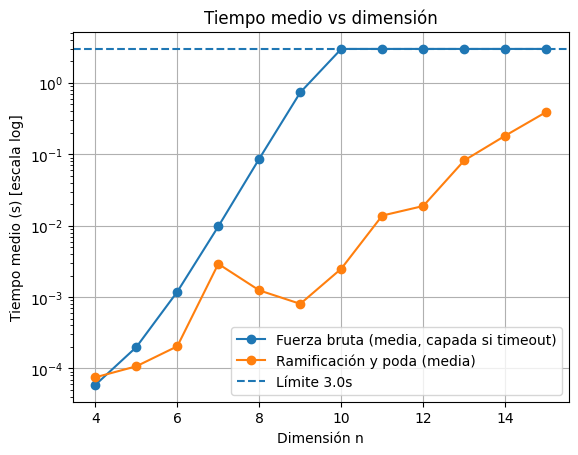

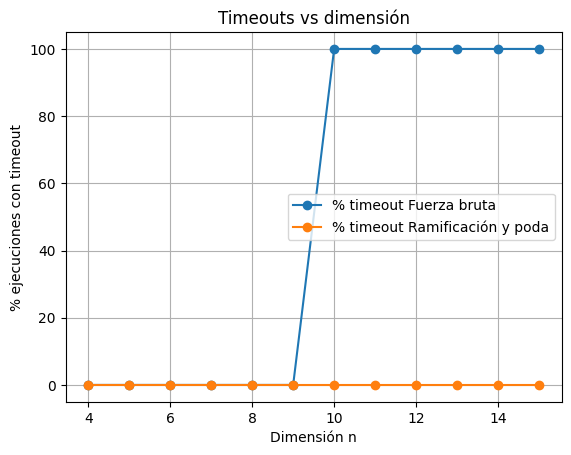

In [22]:
# 1) Unir resultados
df = pd.concat([df_bench, df_bench2], ignore_index=True)

# 2) Resumen por dimensión
resumen = (df.groupby("n", as_index=False)
           .agg(fb_tiempo_med=("fb_tiempo_s","mean"),
                fb_timeout_pct=("fb_timeout","mean"),
                bb_tiempo_med=("bb_tiempo_s","mean"),
                bb_timeout_pct=("bb_timeout","mean")))

resumen["fb_timeout_pct"] *= 100
resumen["bb_timeout_pct"] *= 100

display(resumen)

# 3) Gráfica de tiempos (log) + línea del límite
time_limit = 3.0

plt.figure()
plt.plot(resumen["n"], resumen["fb_tiempo_med"], marker="o", label="Fuerza bruta (media, capada si timeout)")
plt.plot(resumen["n"], resumen["bb_tiempo_med"], marker="o", label="Ramificación y poda (media)")
plt.axhline(time_limit, linestyle="--", label=f"Límite {time_limit}s")
plt.yscale("log")
plt.xlabel("Dimensión n")
plt.ylabel("Tiempo medio (s) [escala log]")
plt.title("Tiempo medio vs dimensión")
plt.legend()
plt.grid(True)
plt.show()

# 4) Gráfica de % timeouts
plt.figure()
plt.plot(resumen["n"], resumen["fb_timeout_pct"], marker="o", label="% timeout Fuerza bruta")
plt.plot(resumen["n"], resumen["bb_timeout_pct"], marker="o", label="% timeout Ramificación y poda")
plt.ylim(-5, 105)
plt.xlabel("Dimensión n")
plt.ylabel("% ejecuciones con timeout")
plt.title("Timeouts vs dimensión")
plt.legend()
plt.grid(True)
plt.show()

## Conclusiones (Ramificación y Poda vs Fuerza Bruta)

### Configuración del experimento
- Se generaron matrices de costes aleatorias de dimensión $n \times n$ para $n = 4,5,\dots,15$.
- Se ejecutaron dos algoritmos:
  - **Fuerza bruta** (explora todas las permutaciones).
  - **Ramificación y poda** (Branch & Bound) usando cotas para podar ramas.
- Se fijó un **límite de tiempo por instancia de $3$ segundos** (timeout).

---

### 1) Viabilidad práctica según la dimensión
- **Fuerza bruta**
  - Es viable hasta **$n=9$**: tiempo medio $\approx 0.737\ \text{s}$, sin timeouts.
  - A partir de **$n=10$** deja de ser una opción práctica: **$100\%$ timeouts** y tiempo medio $\approx 3.0\ \text{s}$ (tiempo “capado” por el límite).
- **Ramificación y poda**
  - No presenta timeouts en todo el rango probado (**$0\%$ de timeouts hasta $n=15$**).
  - Sus tiempos se mantienen muy por debajo del límite: desde $0.000075\ \text{s}$ ($n=4$) hasta $0.391896\ \text{s}$ ($n=15$).

**Respuesta a las preguntas del enunciado:**
- **¿Desde qué dimensión la fuerza bruta deja de ser opción?**  
  $\rightarrow$ **Desde $n=10$** (timeout en el $100\%$ de ejecuciones con límite $3\ \text{s}$).
- **¿Hay una dimensión a partir de la cual ramificación y poda deja de ser válida?**  
  $\rightarrow$ **No se observa para $n \le 15$** con este límite: sigue siendo viable. Para hallar ese punto habría que aumentar $n$ o endurecer las condiciones.

---

### 2) Interpretación de las gráficas
- En **tiempo medio vs dimensión** (escala log):
  - La curva de fuerza bruta crece muy rápido y se “pega” al límite de $3\ \text{s}$ a partir de $n=10$.
  - Ramificación y poda crece mucho más lentamente y permanece claramente por debajo del límite.
- En **timeouts vs dimensión**:
  - Se ve un salto brusco de fuerza bruta a **$100\%$** en $n=10$.
  - Ramificación y poda se mantiene en **$0\%$** en todo el rango.

---

### 3) Explicación del comportamiento observado
- **Fuerza bruta** tiene crecimiento factorial, del orden de $n!$, porque evalúa todas las asignaciones posibles. Por eso, pequeños incrementos de $n$ disparan el tiempo (de $n=9$ a $n=10$ el número de permutaciones se multiplica por $10$).
- **Ramificación y poda** reduce el espacio de búsqueda usando una **cota inferior** para descartar ramas que no pueden mejorar la mejor solución actual (cota superior).
- Importante: aunque aquí funciona muy bien, en el **peor caso** ramificación y poda puede seguir teniendo crecimiento exponencial; en estas instancias aleatorias la poda resulta muy efectiva.

---

### Conclusión final
Con un límite de $3\ \text{s}$ por instancia, **fuerza bruta deja de ser viable a partir de $n=10$**, mientras que **ramificación y poda es viable al menos hasta $n=15$**, resolviendo todas las instancias sin timeouts y con tiempos claramente inferiores al límite.

## Descenso del gradiente

In [23]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [24]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

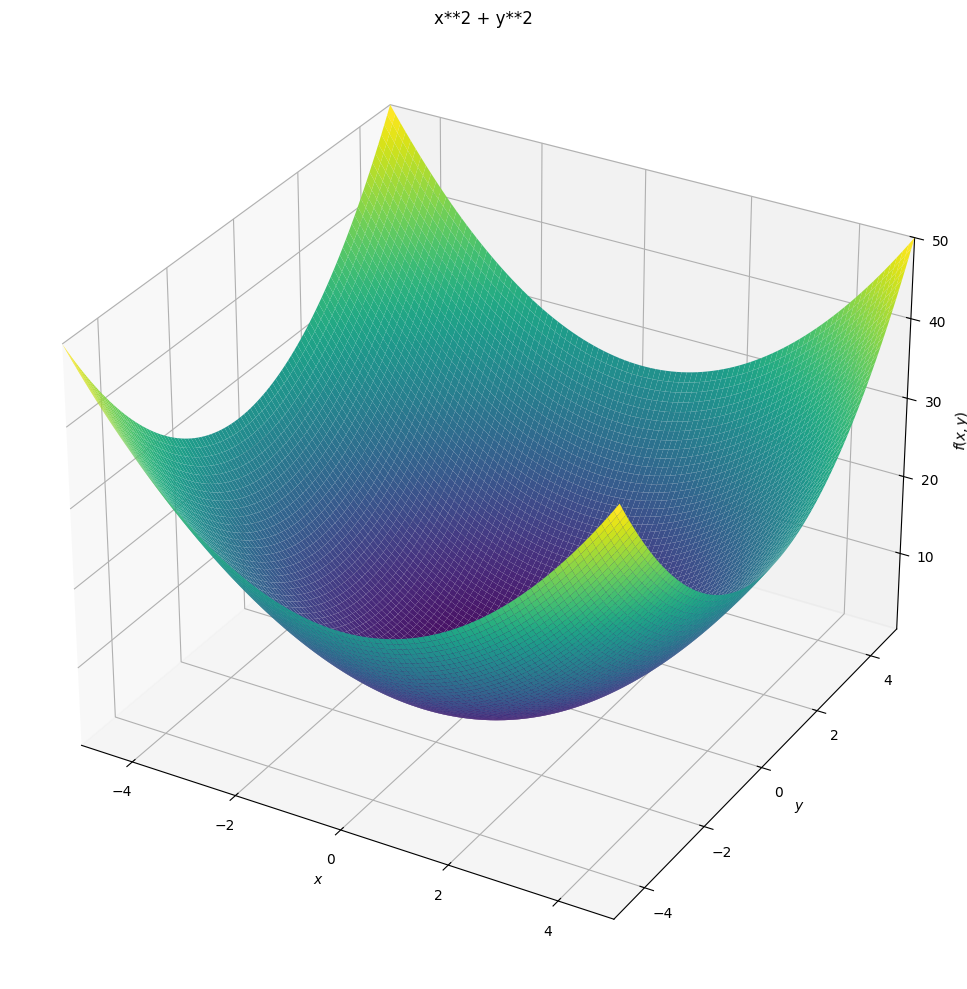

In [25]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

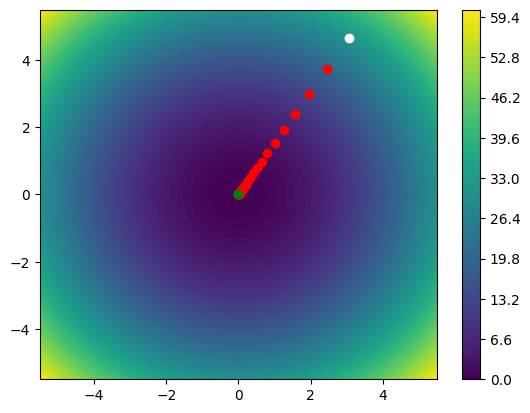

Solucion: [4.372153131333951e-05, 6.653084637033811e-05] 6.33792581913686e-09


In [26]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
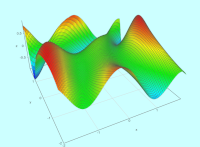


<h2 style="color:#d00000;">✅ MEJORA PARA OPTAR AL 10/10: DOS PUNTOS MÁS CERCANOS</h2>

In [27]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


In [28]:
# ------------------------------------------------------------
# 1) Función objetivo (la de la práctica)
# ------------------------------------------------------------
def f(x, y):
    #Por seguridad numérica en exp(y) (evitar overflow)
    ey = np.exp(np.clip(y, -20, 20))
    A = 0.5*x**2 - 0.25*y**2 + 3.0
    B = 2.0*x + 1.0 - ey
    return np.sin(A) * np.cos(B)

# ------------------------------------------------------------
# 2) Gradiente analítico (más rápido y exacto que aproximarlo)
#    f = sin(A)*cos(B)
#    dA/dx = x,     dA/dy = -0.5 y
#    dB/dx = 2,     dB/dy = -exp(y)
# ------------------------------------------------------------
def grad_f(x, y):
    ey = np.exp(np.clip(y, -20, 20))
    A = 0.5*x**2 - 0.25*y**2 + 3.0
    B = 2.0*x + 1.0 - ey

    sinA, cosA = np.sin(A), np.cos(A)
    sinB, cosB = np.sin(B), np.cos(B)

    dfdx = x*cosA*cosB - 2.0*sinA*sinB
    dfdy = -0.5*y*cosA*cosB + ey*sinA*sinB
    return np.array([dfdx, dfdy], dtype=float)

# ------------------------------------------------------------
# 3) Descenso del gradiente con "backtracking" simple
#    (si el paso empeora, reducimos alpha)
# ------------------------------------------------------------
def descenso_gradiente(x0, y0, alpha=0.05, beta=0.5, max_iter=2000, tol_grad=1e-6, tol_f=1e-10):
    x, y = float(x0), float(y0)
    historial = [(x, y, f(x, y))]
    alpha_actual = alpha

    for k in range(max_iter):
        g = grad_f(x, y)
        ng = np.linalg.norm(g)

        #criterio de parada por gradiente pequeño
        if ng < tol_grad:
            break

        fx = f(x, y)

        #backtracking: intentamos un paso y si sube, reducimos alpha
        paso_ok = False
        a = alpha_actual
        for _ in range(30):
            x_new = x - a*g[0]
            y_new = y - a*g[1]
            f_new = f(x_new, y_new)
            if f_new <= fx:      #minimización: queremos bajar (o igual)
                paso_ok = True
                break
            a *= beta

        if not paso_ok:
            #no encontramos mejora: paramos para evitar bucles raros
            break

        #aplicamos el paso aceptado
        x, y = x_new, y_new
        historial.append((x, y, f_new))

        #criterio de parada por mejora de f muy pequeña
        if abs(historial[-2][2] - historial[-1][2]) < tol_f:
            break

        #guardamos el alpha que funcionó (tasa de aprendizaje "dinámica")
        alpha_actual = a

    return x, y, historial

# ------------------------------------------------------------
# 4) Multiarranque (recomendado en funciones no convexas)
# ------------------------------------------------------------
def multiarranque(n_intentos=20, x_range=(-3, 3), y_range=(-3, 3), seed=0, **gd_kwargs):
    rng = np.random.default_rng(seed)
    mejor = None  # (x,y,fx,hist)

    for i in range(n_intentos):
        x0 = rng.uniform(*x_range)
        y0 = rng.uniform(*y_range)
        x, y, hist = descenso_gradiente(x0, y0, **gd_kwargs)
        fx = hist[-1][2]
        if (mejor is None) or (fx < mejor[2]):
            mejor = (x, y, fx, hist, (x0, y0))
    return mejor

# -------------------
# 5) Ejecutar
# -------------------
mejor_x, mejor_y, mejor_fx, mejor_hist, (x0, y0) = multiarranque(
    n_intentos=30,
    x_range=(-3, 3),
    y_range=(-3, 3),
    seed=123,
    alpha=0.05,
    max_iter=3000
)

print("Mejor punto inicial:", (x0, y0))
print("Mejor solución:", (mejor_x, mejor_y))
print("Valor mínimo encontrado:", mejor_fx)
print("Iteraciones:", len(mejor_hist)-1)

Mejor punto inicial: (2.51160295064126, 0.7532040344127839)
Mejor solución: (np.float64(3.2890403793187293), np.float64(1.4898617981651279))
Valor mínimo encontrado: -0.999999999929652
Iteraciones: 50


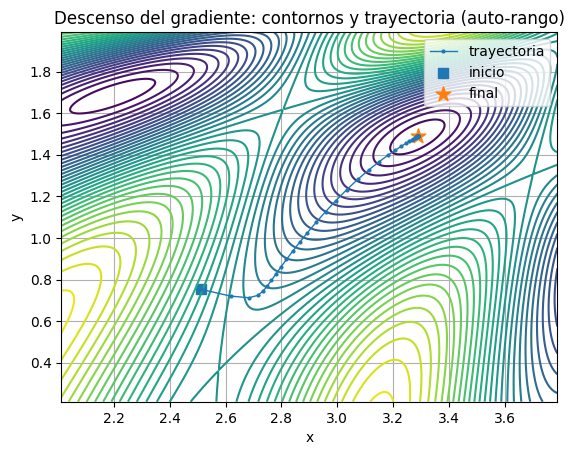

In [31]:
tray = np.array([(a, b) for (a, b, _) in mejor_hist])

#Ajuste automático del rango según la trayectoria
margen = 0.5
xmin, xmax = tray[:,0].min() - margen, tray[:,0].max() + margen
ymin, ymax = tray[:,1].min() - margen, tray[:,1].max() + margen

xs = np.linspace(xmin, xmax, 350)
ys = np.linspace(ymin, ymax, 350)
X, Y = np.meshgrid(xs, ys)
Z = f(X, Y)

plt.figure()
plt.contour(X, Y, Z, levels=35)
plt.plot(tray[:,0], tray[:,1], "-o", markersize=2, linewidth=1, label="trayectoria")
plt.scatter(tray[0,0], tray[0,1], marker="s", s=60, label="inicio")
plt.scatter(tray[-1,0], tray[-1,1], marker="*", s=120, label="final")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Descenso del gradiente: contornos y trayectoria (auto-rango)")
plt.grid(True)
plt.legend()
plt.show()

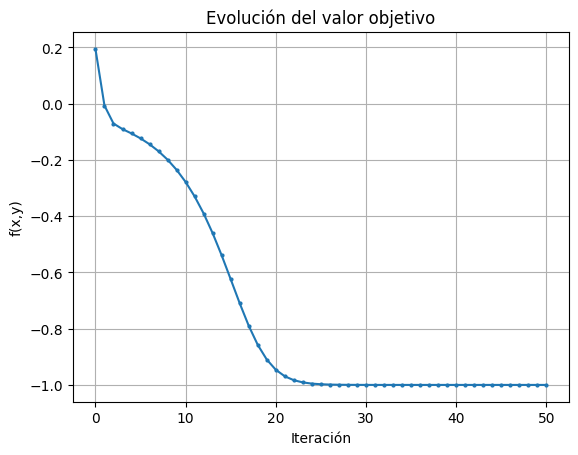

In [32]:
vals = [v for (_, _, v) in mejor_hist]
plt.figure()
plt.plot(range(len(vals)), vals, marker="o", markersize=2)
plt.xlabel("Iteración")
plt.ylabel("f(x,y)")
plt.title("Evolución del valor objetivo")
plt.grid(True)
plt.show()

## Conclusiones (Descenso del gradiente)

### Función y objetivo
Se ha aplicado **descenso del gradiente** para minimizar la función
$$
f(x,y)=\sin\left(\tfrac12 x^2-\tfrac14 y^2+3\right)\cdot \cos\left(2x+1-e^y\right).
$$
Dado que $\sin(\cdot)$ y $\cos(\cdot)$ están acotadas en $[-1,1]$, se cumple que $f(x,y)\in[-1,1]$, por lo que alcanzar valores cercanos a $-1$ indica una solución muy buena.

### Convergencia observada
- A partir del punto inicial **$(2.5116,\ 0.7532)$**, el algoritmo converge a **$(3.2890,\ 1.4899)$**.
- El valor mínimo obtenido es **$f(x,y)\approx -0.99999999993$**, prácticamente el mínimo teórico $-1$.
- Se necesitaron **50 iteraciones**, observándose que el valor objetivo se estabiliza cerca de $-1$ a partir de aproximadamente **20–30 iteraciones**, lo que sugiere **convergencia** (mejoras ya despreciables).

### Interpretación de las gráficas
- **Gráfica de contornos + trayectoria:** la trayectoria avanza de forma progresiva hacia una región donde las curvas de nivel se cierran alrededor del punto final, lo que es consistente con la llegada a un mínimo (zona “en forma de cuenca”).
- **Gráfica de evolución del valor objetivo:** se aprecia una disminución clara y monótona del valor de $f(x,y)$ hasta aproximarse a $-1$, seguida de una fase de estabilización (pasos cada vez más pequeños cerca del mínimo).

### Comentario sobre mínimos locales
La función es **no convexa** y presenta oscilaciones, por lo que el descenso del gradiente puede converger a **mínimos locales** dependiendo del punto inicial. Para reducir este efecto se recomienda usar **multiarranque** (varios puntos iniciales) y quedarse con el mejor resultado encontrado.

### Conclusión final
El descenso del gradiente ha mostrado un comportamiento estable y convergente en el experimento, alcanzando un valor prácticamente óptimo **muy cercano a $-1$**, con una trayectoria coherente en el mapa de contornos y una evolución del objetivo que evidencia convergencia.